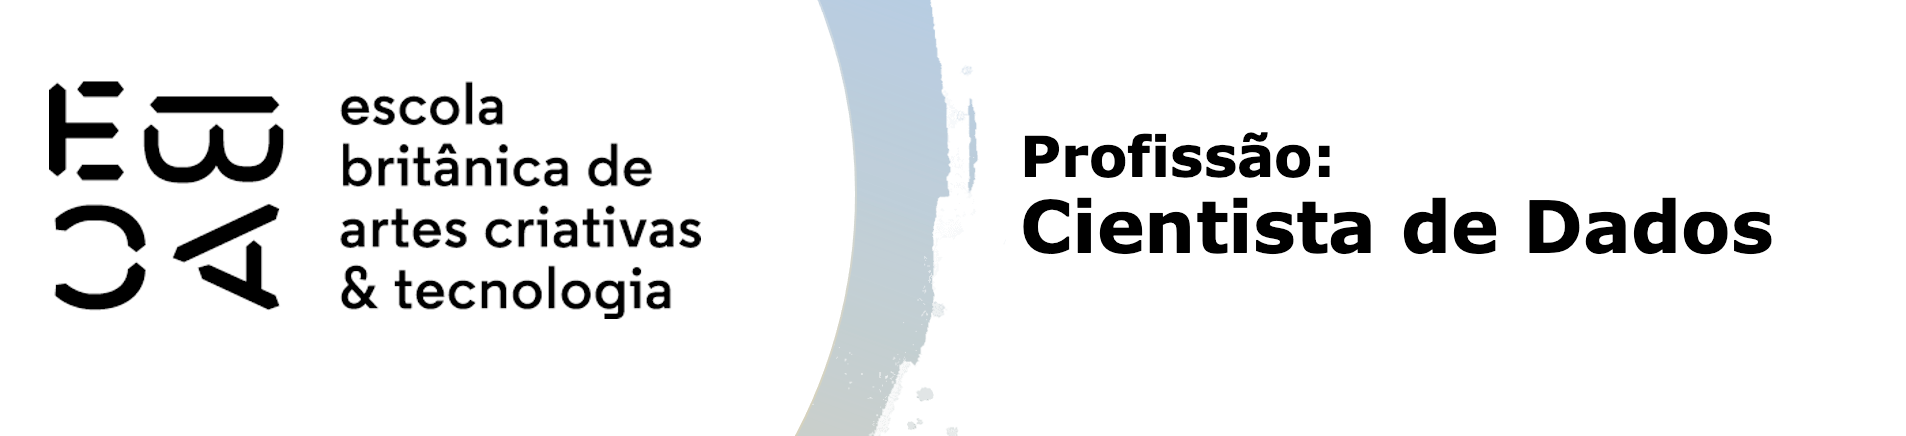

---

<!-- # **Profissão: Cientista de Dados** -->
### **Módulo 38** | Projeto Final

**Aluno:** [Marcio da Silva](https://www.linkedin.com/in/marcio-d-silva/)<br>
**Data:** 14 de fevereiro de 2025.

---


# Tarefa II

Neste projeto, estamos construindo um credit scoring para cartão de crédito, em um desenho amostral com 15 safras, e utilizando 12 meses de performance.

Carregue a base de dados ```credit_scoring.ftr```.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t

import warnings
warnings.filterwarnings("ignore")

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


## Amostragem

Separe os três últimos meses como safras de validação *out of time* (oot).

Variáveis:<br>
Considere que a variável ```data_ref``` não é uma variável explicativa, é somente uma variável indicadora da safra, e não deve ser utilizada na modelagem. A variávei ```index``` é um identificador do cliente, e também não deve ser utilizada como covariável (variável explicativa). As restantes podem ser utilizadas para prever a inadimplência, incluindo a renda.


In [8]:
dataset = df.sample(50000)

In [9]:
df.columns

Index(['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda', 'mau'],
      dtype='object')

In [10]:
dataset.drop(['data_ref','index'], axis=1, inplace=True)

## Descritiva básica univariada

- Descreva a base quanto ao número de linhas, número de linhas para cada mês em ```data_ref```.
- Faça uma descritiva básica univariada de cada variável. Considere as naturezas diferentes: qualitativas e quantitativas.

In [11]:
#Data minima
df.data_ref.min()

Timestamp('2015-01-01 00:00:00')

In [12]:
#Data maxima
df.data_ref.max()

Timestamp('2016-03-01 00:00:00')

In [13]:
# Retornando os ultimos 3 meses
meses = 3
data = pd.Series(pd.date_range('1/1/2016', periods = meses, freq = 'MS'))
date = pd.DataFrame(data)
date = date.rename({0:'oot'}, axis = 'columns')
date

,oot
0,2016-01-01
1,2016-02-01
2,2016-03-01


In [14]:
print('número de linhas: {0}'.format(df.shape[0]))
date.value_counts()
df.data_ref.value_counts()

número de linhas: 750000


data_ref
2015-01-01    50000
2015-02-01    50000
2015-03-01    50000
2015-04-01    50000
2015-05-01    50000
2015-06-01    50000
2015-07-01    50000
2015-08-01    50000
2015-09-01    50000
2015-10-01    50000
2015-11-01    50000
2015-12-01    50000
2016-01-01    50000
2016-02-01    50000
2016-03-01    50000
Name: count, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   data_ref               750000 non-null  datetime64[ns]
 1   index                  750000 non-null  int64         
 2   sexo                   750000 non-null  object        
 3   posse_de_veiculo       750000 non-null  object        
 4   posse_de_imovel        750000 non-null  object        
 5   qtd_filhos             750000 non-null  int64         
 6   tipo_renda             750000 non-null  object        
 7   educacao               750000 non-null  object        
 8   estado_civil           750000 non-null  object        
 9   tipo_residencia        750000 non-null  object        
 10  idade                  750000 non-null  int64         
 11  tempo_emprego          624043 non-null  float64       
 12  qt_pessoas_residencia  750000 non-null  floa

    Para realizar uma descrição básica univariada de cada variável, considerando diferentes naturezas (qualitativas e quantitativas), você pode usar o método .describe() para variáveis numéricas e .describe(include=['object']) para variáveis categóricas (qualitativas).

##### Aqui estão os passos para fazer isso:

##### Variáveis Numéricas (Quantitativas):

Use o método .describe() para obter estatísticas resumidas, como contagem, média, desvio padrão, mínimo, 25º percentil, mediana (50º percentil), 75º percentil e máximo.

##### Variáveis Categóricas (Qualitativas):

Use o método .describe(include=['object']) para obter estatísticas resumidas, como contagem, número de valores únicos, valor mais frequente e sua frequência.

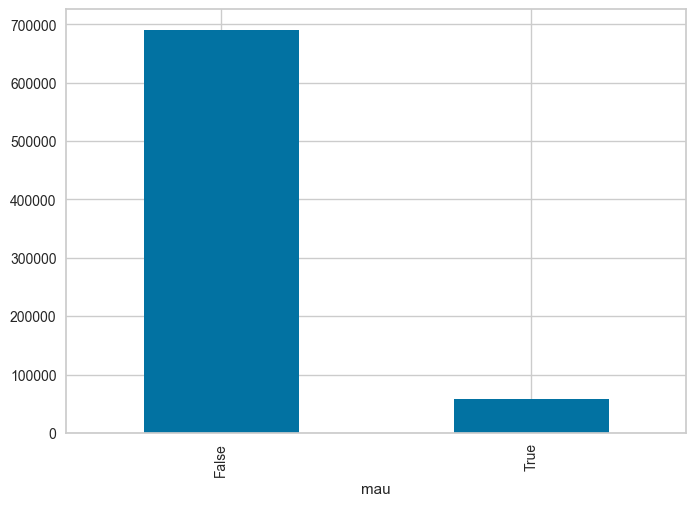

In [16]:
var = 'mau'
grafico_barras = df[var].value_counts().plot.bar()

<Figure size 800x550 with 0 Axes>

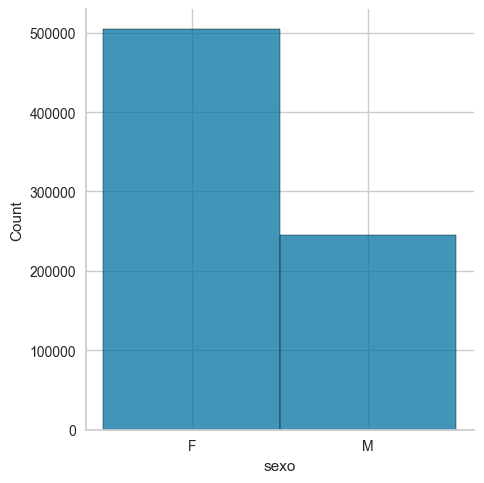

In [17]:
df.sexo.value_counts()
plt.clf()
var = "sexo"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 800x550 with 0 Axes>

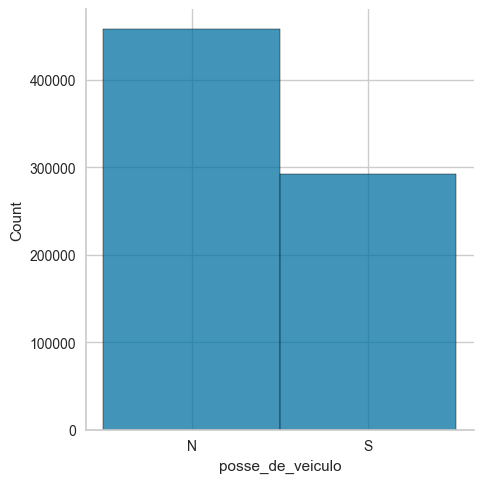

In [18]:
df.posse_de_veiculo.value_counts()
plt.clf()
var = "posse_de_veiculo"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 800x550 with 0 Axes>

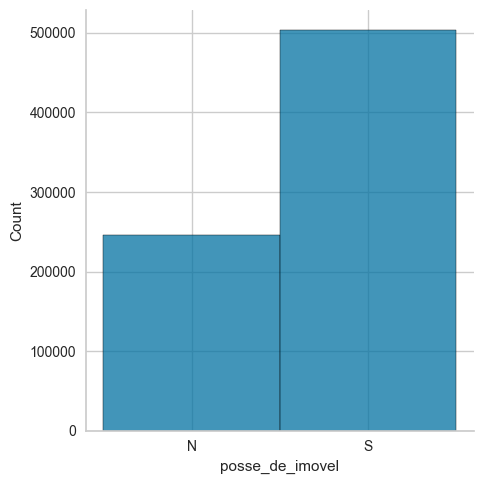

In [19]:
df.posse_de_imovel.value_counts()
plt.clf()
var = "posse_de_imovel"
sns.displot(df, x = var, bins = 50)
plt.show()

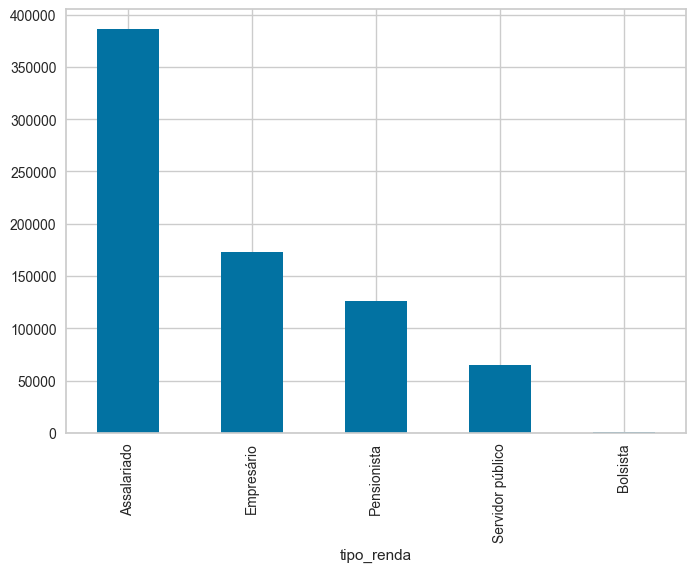

In [20]:
var = 'tipo_renda'
grafico_barras = df[var].value_counts().plot.bar()

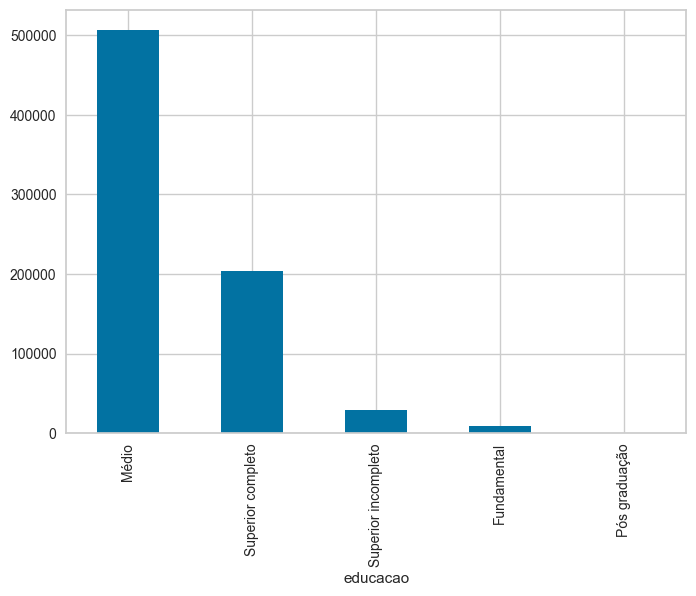

In [21]:
var = 'educacao'
grafico_barras = df[var].value_counts().plot.bar()

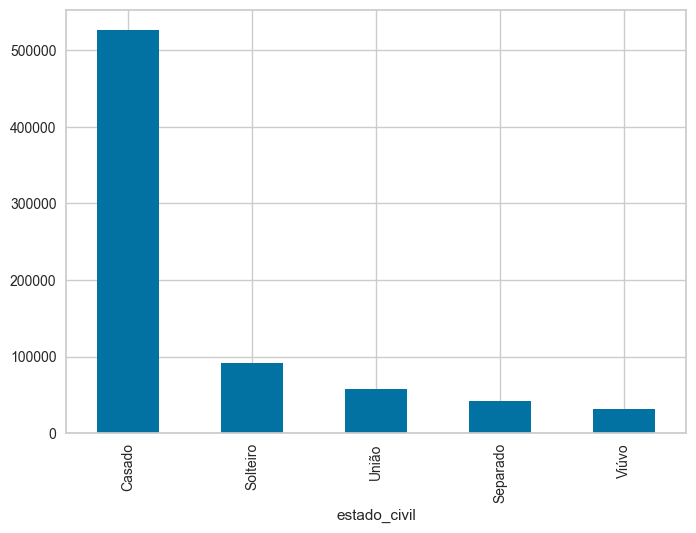

In [22]:
var = 'estado_civil'
grafico_barras = df[var].value_counts().plot.bar()

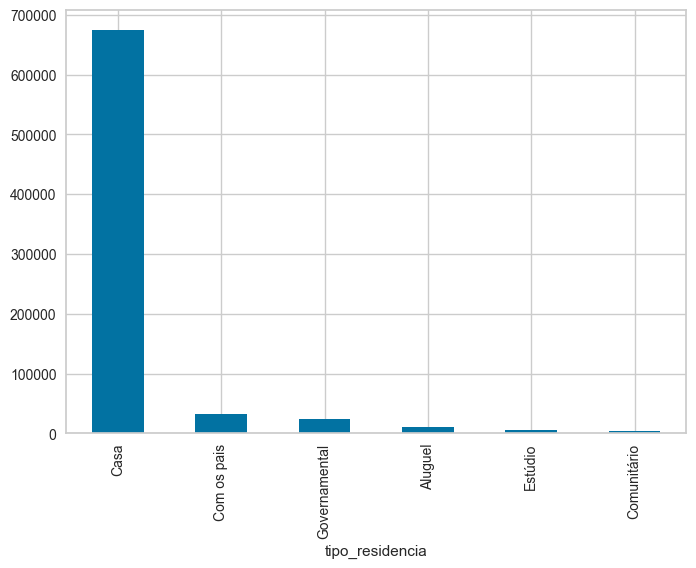

In [23]:
var = 'tipo_residencia'
grafico_barras = df[var].value_counts().plot.bar()

<Figure size 800x550 with 0 Axes>

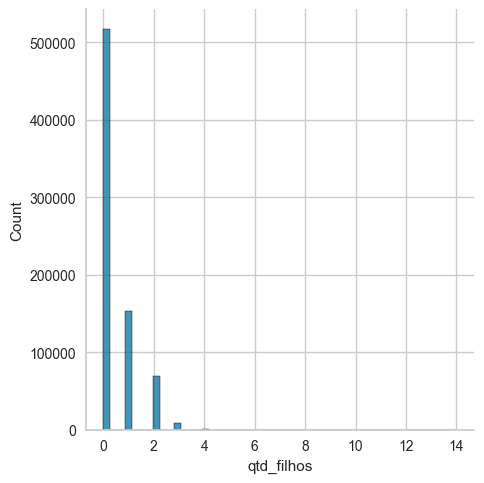

In [24]:
plt.clf()
var = "qtd_filhos"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 800x550 with 0 Axes>

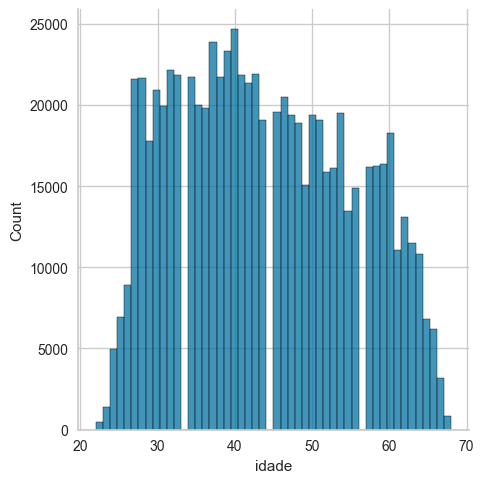

In [25]:
plt.clf()
var = "idade"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 800x550 with 0 Axes>

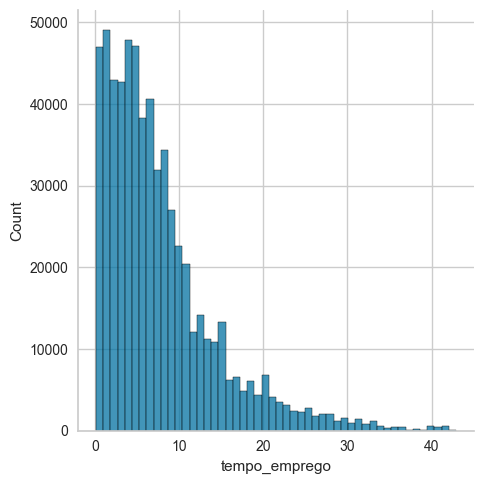

In [26]:
plt.clf()
var = "tempo_emprego"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 800x550 with 0 Axes>

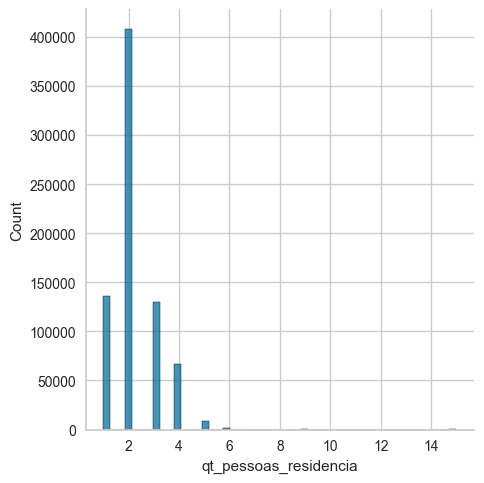

In [27]:
plt.clf()
var = "qt_pessoas_residencia"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 800x550 with 0 Axes>

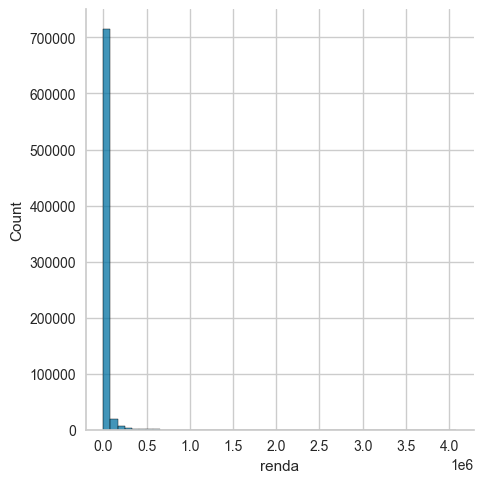

In [28]:
plt.clf()
var = "renda"
sns.displot(df, x = var, bins = 50)
plt.show()

## Descritiva bivariada

Faça uma análise descritiva bivariada de cada variável

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   data_ref               750000 non-null  datetime64[ns]
 1   index                  750000 non-null  int64         
 2   sexo                   750000 non-null  object        
 3   posse_de_veiculo       750000 non-null  object        
 4   posse_de_imovel        750000 non-null  object        
 5   qtd_filhos             750000 non-null  int64         
 6   tipo_renda             750000 non-null  object        
 7   educacao               750000 non-null  object        
 8   estado_civil           750000 non-null  object        
 9   tipo_residencia        750000 non-null  object        
 10  idade                  750000 non-null  int64         
 11  tempo_emprego          624043 non-null  float64       
 12  qt_pessoas_residencia  750000 non-null  floa

<Axes: xlabel='sexo', ylabel='mau'>

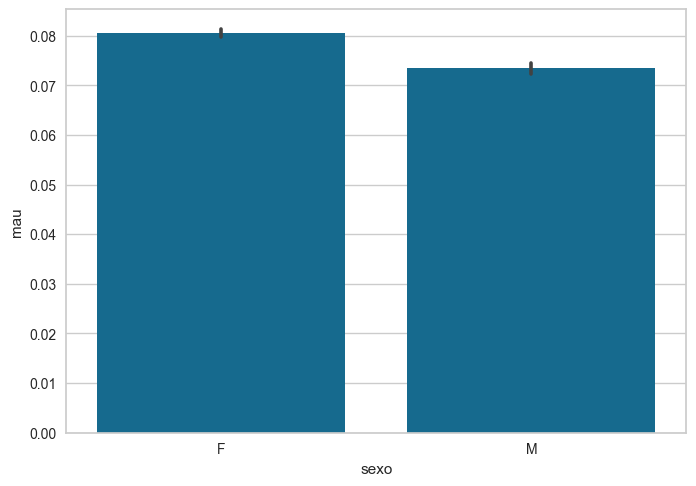

In [30]:
sns.barplot(x='sexo', y = 'mau', data=df)

<Axes: xlabel='posse_de_veiculo', ylabel='mau'>

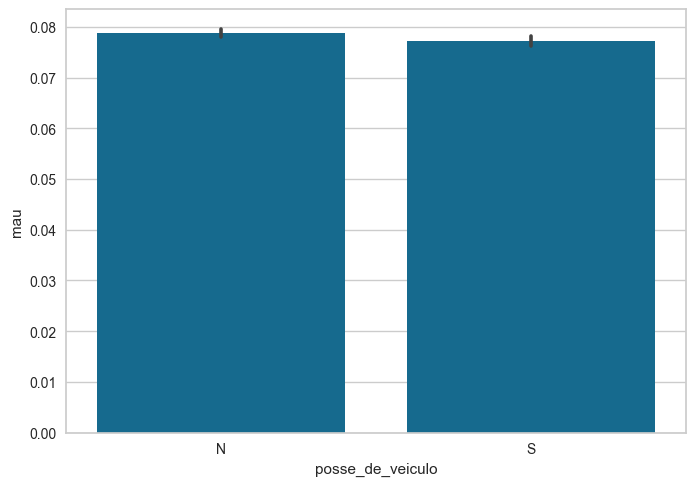

In [31]:
sns.barplot(x='posse_de_veiculo', y = 'mau', data=df)

<Axes: xlabel='posse_de_imovel', ylabel='mau'>

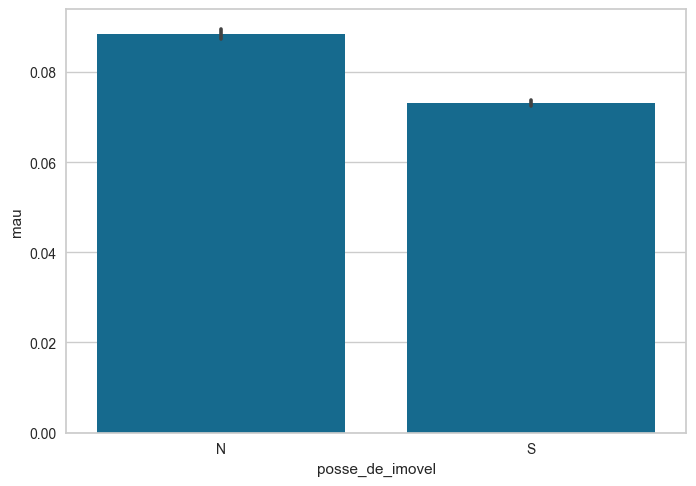

In [32]:
sns.barplot(x='posse_de_imovel', y = 'mau', data=df)

<Axes: xlabel='tipo_renda', ylabel='mau'>

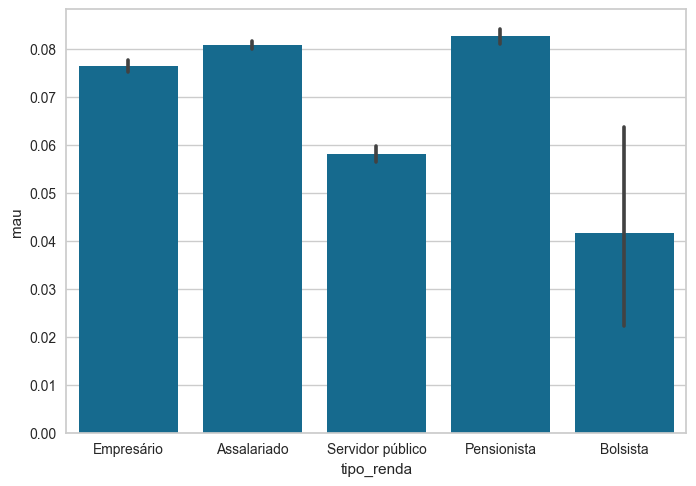

In [33]:
sns.barplot(x='tipo_renda', y = 'mau', data=df)

[Text(0, 0, 'Médio'),
 Text(1, 0, 'Superior incompleto'),
 Text(2, 0, 'Superior completo'),
 Text(3, 0, 'Fundamental'),
 Text(4, 0, 'Pós graduação')]

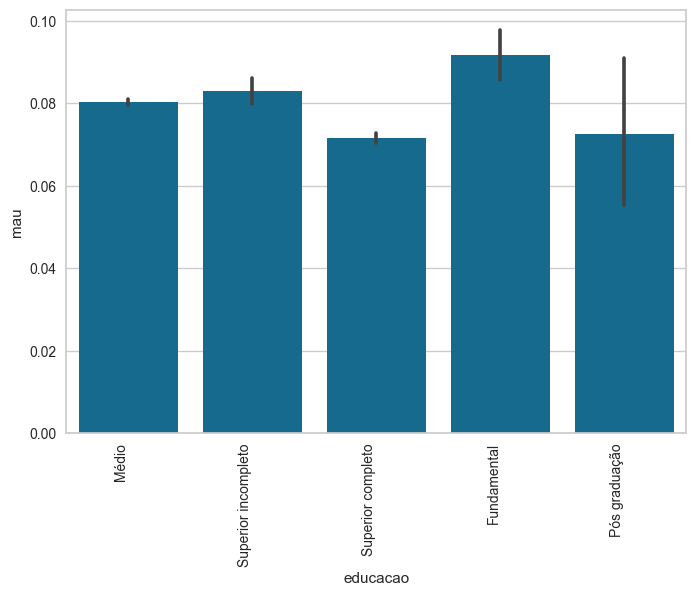

In [34]:
educacao = sns.barplot(x='educacao', y = 'mau', data=df)
educacao.set_xticklabels(educacao.get_xticklabels(), rotation=90, horizontalalignment='right')

<Axes: xlabel='estado_civil', ylabel='mau'>

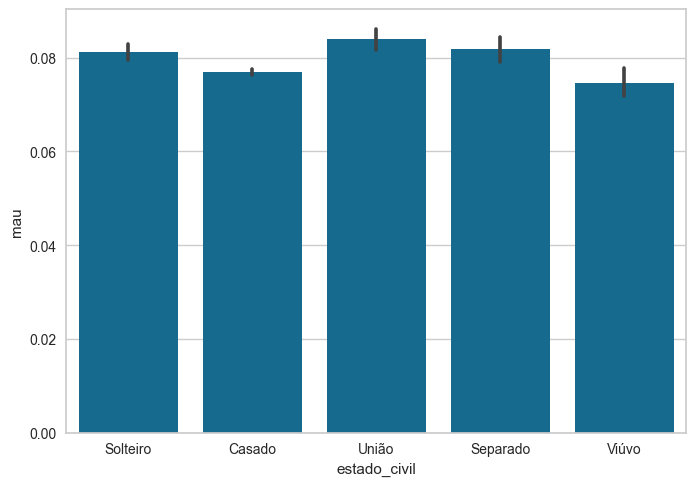

In [35]:
sns.barplot(x='estado_civil', y = 'mau', data=df)

[Text(0, 0, 'Casa'),
 Text(1, 0, 'Com os pais'),
 Text(2, 0, 'Aluguel'),
 Text(3, 0, 'Comunitário'),
 Text(4, 0, 'Governamental'),
 Text(5, 0, 'Estúdio')]

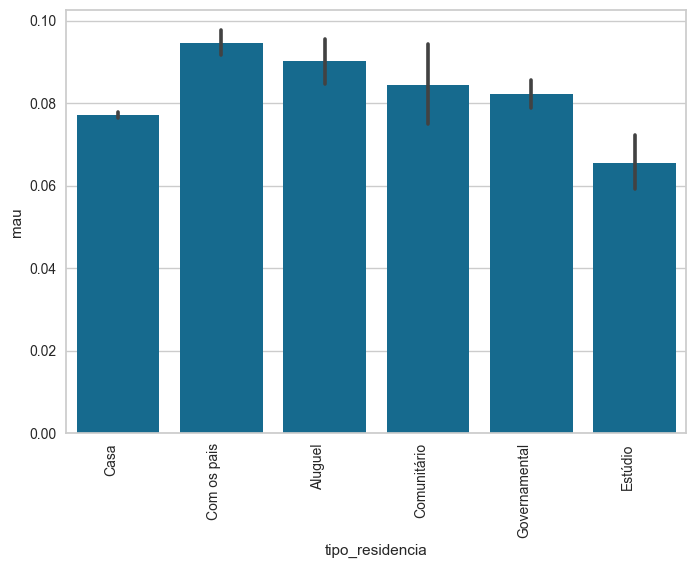

In [36]:
tipo_residencia = sns.barplot(x='tipo_residencia', y = 'mau', data=df)    
tipo_residencia.set_xticklabels(tipo_residencia.get_xticklabels(), rotation=90, horizontalalignment='right')

## Desenvolvimento do modelo

Desenvolva um modelo de *credit scoring* através de uma regressão logística.

- Trate valores missings e outliers
- Trate 'zeros estruturais'
- Faça agrupamentos de categorias conforme vimos em aula
- Proponha uma equação preditiva para 'mau'
- Caso hajam categorias não significantes, justifique

In [37]:
df.isna().sum()

data_ref                      0
index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125957
qt_pessoas_residencia         0
renda                         0
mau                           0
dtype: int64

In [38]:
df['tempo_emprego'].fillna(df['tempo_emprego'].mean())

0          6.873973
1          4.526027
2          0.243836
3         12.772603
4          8.432877
            ...    
749995     3.038356
749996     7.748574
749997    10.375342
749998    13.780822
749999    10.375342
Name: tempo_emprego, Length: 750000, dtype: float64

In [39]:
metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['valores_unicos'] = df.nunique()

metadados

,dtype,valores_unicos
data_ref,datetime64[ns],15
index,int64,16650
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6


In [40]:
df['mau'] = df.mau.astype('int64')

In [41]:
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    tab['ep'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    
    tab['pct_nao_evento'] = tab[rótulo_nao_evento]/tab.loc['total',rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
    return tab['iv_parcial'].sum()

In [42]:
iv_sexo = IV(df.sexo, df.mau)
print(f'IV da variável SEXO: {iv_sexo:.1%}')

IV da variável SEXO: 0.2%


In [43]:
metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['valores_unicos'] = df.nunique()
metadados['variavel'] = 'covariavel'
metadados.loc['mau','variavel'] = 'resposta'
metadados.loc['bom','variavel'] = 'resposta'
metadados

,dtype,valores_unicos,variavel
data_ref,datetime64[ns],15.0,covariavel
index,int64,16650.0,covariavel
sexo,object,2.0,covariavel
posse_de_veiculo,object,2.0,covariavel
posse_de_imovel,object,2.0,covariavel
qtd_filhos,int64,8.0,covariavel
tipo_renda,object,5.0,covariavel
educacao,object,5.0,covariavel
estado_civil,object,5.0,covariavel
tipo_residencia,object,6.0,covariavel


In [44]:
var='idade'
IV(pd.qcut(df[var],5,duplicates='drop'), df.mau)

0.01796842289500074

In [45]:
for var in metadados[metadados.variavel=='covariavel'].index:
    if (metadados.loc[var, 'valores_unicos']>6):
        metadados.loc[var, 'IV'] = IV(pd.qcut(df[var],5,duplicates='drop'), df.mau)
    else:
        metadados.loc[var, 'IV'] = IV(df[var], df.mau)
        
        
metadados

,dtype,valores_unicos,variavel,IV
data_ref,datetime64[ns],15.0,covariavel,0.345982
index,int64,16650.0,covariavel,0.002664
sexo,object,2.0,covariavel,0.002185
posse_de_veiculo,object,2.0,covariavel,0.000108
posse_de_imovel,object,2.0,covariavel,0.009693
qtd_filhos,int64,8.0,covariavel,0.000030
tipo_renda,object,5.0,covariavel,0.009360
educacao,object,5.0,covariavel,0.003547
estado_civil,object,5.0,covariavel,0.001126
tipo_residencia,object,6.0,covariavel,0.003045


In [46]:
def biv_discreta(var, df):
    df['bom'] = 1-df.mau
    g = df.groupby(var)
    
    biv = pd.DataFrame({'qt_bom': g['bom'].sum(),
                       'qt_mau': g['bom'].sum(),
                       'mau':g['bom'].mean(),
                       var: g['bom'].mean().index,
                       'cont':g[var].count()})
    biv['ep'] = (biv.mau*(1-biv.mau)/biv.cont)**.5
    biv['mau_sup'] = biv.mau+t.ppf([0.975], biv.cont-1)*biv.ep
    biv['mau_inf'] = biv.mau+t.ppf([0.025], biv.cont-1)*biv.ep
    
    biv['logit'] = np.log(biv.mau/(1-biv.mau))
    biv['logit_sup'] = np.log(biv.mau_sup/(1-biv.mau_sup))
    biv['logit_inf'] = np.log(biv.mau_sup/(1-biv.mau_inf))
    
    tx_mau_geral = df.mau.mean()
    woe_geral = np.log(df.mau.mean() / (1 - df.mau.mean()))
    
    biv['woe'] = biv.logit - woe_geral
    biv['woe_sup'] = biv.logit_sup - woe_geral
    biv['woe_inf'] = biv.logit_inf - woe_geral
    
    fig, ax = plt.subplots(2,1, figsize=(8,6))
    ax[0].plot(biv[var], biv.woe,  ':bo', label='woe')
    ax[0].plot(biv[var], biv.woe_sup, 'o:r', label='limite superior')
    ax[0].plot(biv[var], biv.woe_inf, 'o:r', label='limite superior')
        
    num_cat = biv.shape[0]
    ax[0].set_xlim([-.3, num_cat-.7])
    
    ax[0].set_ylabel("Weight of Evidence")
    ax[0].legend(bbox_to_anchor=(.83, 1.17), ncol=3)
    
    ax[0].set_xticks(list(range(num_cat)))
    ax[0].set_xticklabels(biv[var], rotation=15)
    
    ax[1] = biv.cont.plot.bar()
    return biv

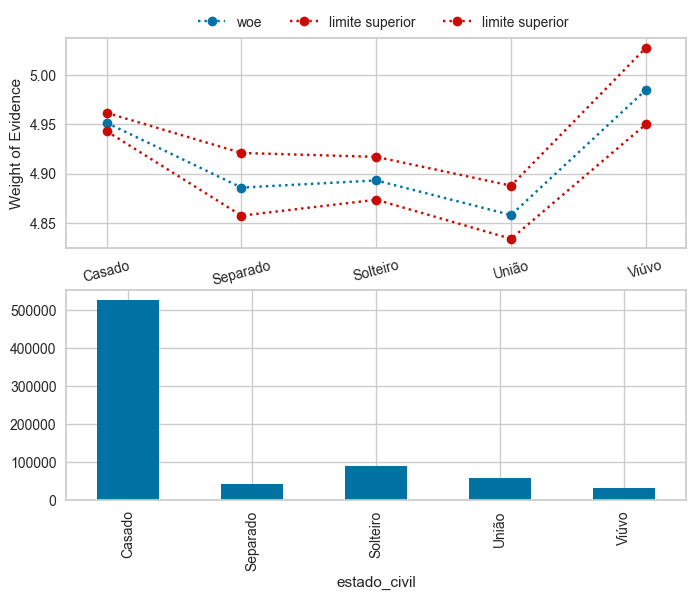

In [47]:
biv_discreta('estado_civil', df);

0.009314630323182816

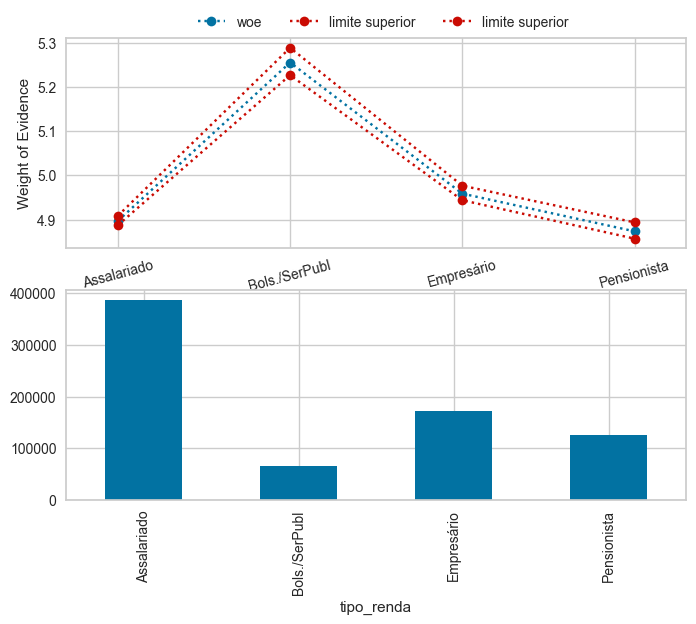

In [48]:
df2 = df.copy()
df2.tipo_renda.replace({'Bolsista': 'Bols./SerPubl', 'Servidor público': 'Bols./SerPubl'}, inplace=True)
biv_discreta('tipo_renda', df2)
IV(df2.tipo_renda, df.mau)

0.0035462413857734764

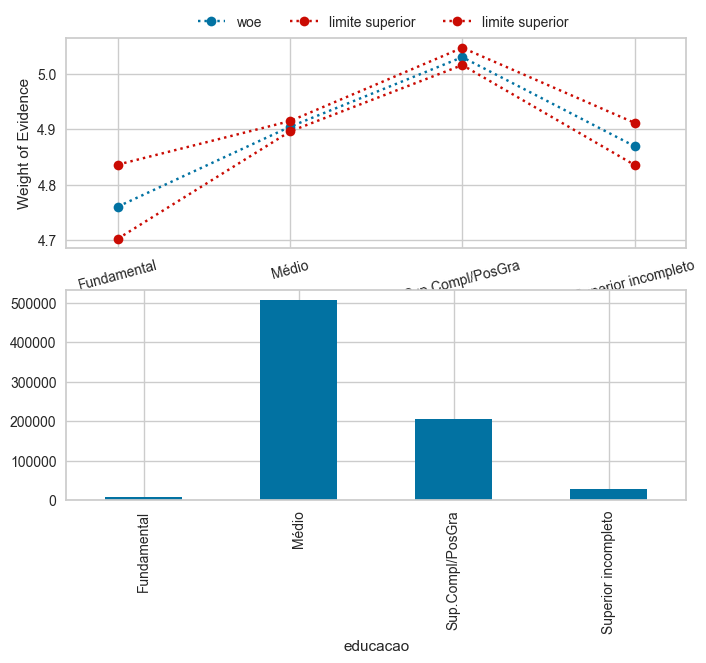

In [49]:
df2.educacao.replace({'Superior completo': 'Sup.Compl/PosGra', 'Pós graduação': 'Sup.Compl/PosGra'}, inplace=True)
biv_discreta('educacao', df2)
IV(df2.educacao, df.mau)

0.0023941390471014087

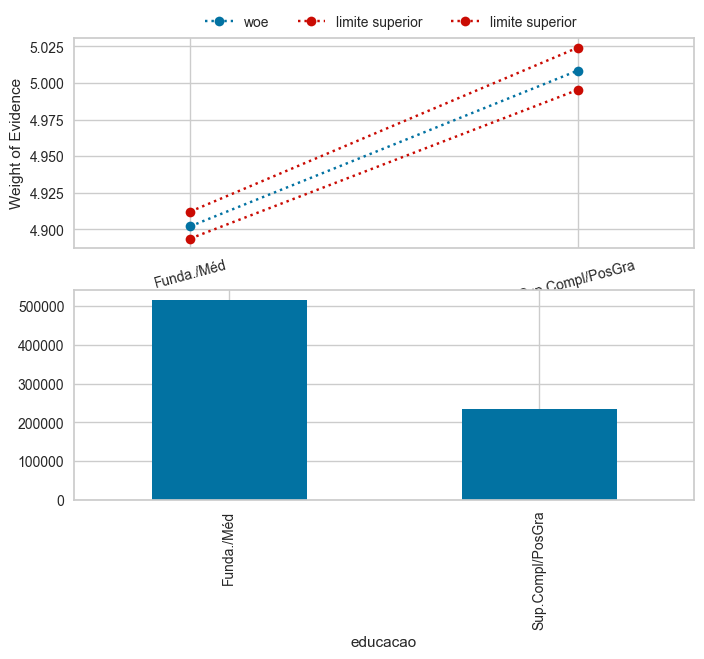

In [50]:
df2.educacao.replace({'Superior incompleto':'Sup.Compl/PosGra', 
                      'Fundamental':'Funda./Méd',
                      'Médio': 'Funda./Méd'
                     }, inplace=True)
biv_discreta('educacao', df2)
IV(df2.educacao, df.mau)

## Avaliação do modelo

Avalie o poder discriminante do modelo pelo menos avaliando acurácia, KS e Gini.

Avalie estas métricas nas bases de desenvolvimento e *out of time*.

In [51]:
pd.crosstab(df['mau'], date['oot'])

oot,2016-01-01,2016-02-01,2016-03-01
mau,,,
0,1,1,1


## Criar um pipeline utilizando o sklearn pipeline 

In [52]:
from pycaret.classification import *

In [53]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


X_digits, y_digits = load_digits(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=10)

pca = PCA(n_components=20)

scaler = StandardScaler()

logistic = LogisticRegression(max_iter=200)


## Pré processamento

### Substituição de nulos (nans)

Existe nulos na base? é dado numérico ou categórico? qual o valor de substituição? média? valor mais frequente? etc

In [54]:
X_digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [55]:
# Suponha que 'X_digits' seja um array NumPy
X_digits.shape

# 'shape' agora contém uma tupla com o número de linhas e colunas
# Por exemplo, se 'X_digits' tiver 100 linhas e 20 colunas, shape será (100, 20)

(1797, 64)

In [56]:
X_train.shape

(1257, 64)

In [57]:
# "Fitando" e aplicando Z score nos dados de treino
scaler.fit(X_train)
X_train = scaler.transform(X_train)

### Redução de dimensionalidade (PCA)

Aplicar PCA para reduzir a dimensionalidade para 5

In [58]:
pca.fit(X_train)
X_train =  pca.transform(X_train)

In [59]:
# "Fitando" e predizendo uma regressão logística nos dados de treino
logistic.fit(X_train, y_train)

logistic.predict(X_train)

array([0, 0, 0, ..., 2, 1, 2])

In [60]:
# Aplicando nos dados de teste o Z score "fitado" nos dados de treino  
X_test = scaler.transform(X_test)

In [61]:
# Aplicando nos dados de teste o PCA "fitado" nos dados de treino  
X_test = pca.transform(X_test)


In [62]:
# Predizendo nos dados de teste o modelo "fitado" nos dados de treino
logistic.predict(X_test)

array([5, 2, 5, 4, 8, 3, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 6,
       6, 7, 8, 8, 5, 8, 9, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 1,
       2, 9, 6, 1, 9, 4, 4, 5, 8, 4, 8, 5, 9, 7, 8, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 9, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 2, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 2, 4, 6, 0, 8, 8, 1, 1, 7, 9, 9, 5, 2, 3, 3, 9, 7, 6,
       2, 5, 4, 3, 8, 7, 6, 7, 2, 7, 4, 9, 5, 1, 9, 8, 6, 1, 8, 1, 4, 0,
       9, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 5, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 3, 3, 1, 7,
       1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 9, 1, 5,
       4, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 7, 5, 6, 1, 5, 7, 0, 8, 6, 2, 5, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 1, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 4, 6, 2, 2, 0, 8, 4, 7, 3, 3,

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=10)

# Define a PCA to Linear dimensionality reduction
pca_pipe = PCA(n_components=15)

# Define a Standard Scaler to normalize inputs
scaler_pipe = StandardScaler()

# set the tolerance to a large value to make the example faster
logistic_pipe = LogisticRegression(max_iter=200)


In [64]:
pipe = Pipeline(steps=[("scaler", scaler_pipe), 
                       ("pca", pca_pipe), 
                       ("logistic", logistic_pipe)])

In [65]:
pipe.named_steps

{'scaler': StandardScaler(),
 'pca': PCA(n_components=15),
 'logistic': LogisticRegression(max_iter=200)}

In [66]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=15)),
                ('logistic', LogisticRegression(max_iter=200))])

In [67]:
pipe.predict(X_train)

array([0, 0, 0, ..., 1, 8, 2])

In [68]:
pipe.predict(X_test)

array([5, 2, 5, 4, 8, 1, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 6,
       6, 7, 8, 8, 5, 8, 9, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 1,
       2, 3, 6, 1, 9, 4, 4, 9, 8, 4, 8, 5, 9, 7, 1, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 3, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 2, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 2, 4, 6, 0, 8, 8, 1, 1, 7, 8, 9, 5, 2, 3, 3, 9, 7, 6,
       2, 5, 4, 3, 8, 4, 6, 7, 2, 7, 4, 9, 5, 1, 9, 8, 6, 1, 8, 1, 4, 0,
       9, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 9, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 8, 3, 1, 7,
       1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 0, 1, 5,
       4, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 7, 5, 6, 1, 8, 7, 0, 8, 6, 2, 5, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 1, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 4, 6, 2, 2, 0, 8, 4, 7, 3, 3,

In [69]:
pipe.named_steps

{'scaler': StandardScaler(),
 'pca': PCA(n_components=15),
 'logistic': LogisticRegression(max_iter=200)}

In [70]:
pipe.steps

[('scaler', StandardScaler()),
 ('pca', PCA(n_components=15)),
 ('logistic', LogisticRegression(max_iter=200))]

In [71]:
pipe[0]

StandardScaler()

In [72]:
pipe[1]

PCA(n_components=15)

In [73]:
pipe[2]

LogisticRegression(max_iter=200)

In [74]:
pipe[1].transform(X_train)

array([[  0.87092773, -12.61652684, -18.95615503, ...,   5.27976728,
         15.95638644,   4.0888627 ],
       [  7.38995006,  -7.84656031, -16.49057574, ...,   8.66801953,
         19.90410284,   2.99064591],
       [  8.28988533, -10.02913135, -14.17138936, ...,   9.3087154 ,
         27.21613054,   4.47747763],
       ...,
       [-12.90648056, -12.7709272 ,  16.69169848, ...,   1.73238924,
         10.26841947,   7.04119961],
       [-12.20203406,  -2.58831221,   7.0077084 , ...,   8.86914406,
          9.83716085,   3.08556484],
       [-11.21469115,   2.61243303,   2.68293506, ...,   4.22458771,
         18.59885475,  -4.45974259]])

In [75]:
pca_pipe.transform(X_train)

array([[  0.87092773, -12.61652684, -18.95615503, ...,   5.27976728,
         15.95638644,   4.0888627 ],
       [  7.38995006,  -7.84656031, -16.49057574, ...,   8.66801953,
         19.90410284,   2.99064591],
       [  8.28988533, -10.02913135, -14.17138936, ...,   9.3087154 ,
         27.21613054,   4.47747763],
       ...,
       [-12.90648056, -12.7709272 ,  16.69169848, ...,   1.73238924,
         10.26841947,   7.04119961],
       [-12.20203406,  -2.58831221,   7.0077084 , ...,   8.86914406,
          9.83716085,   3.08556484],
       [-11.21469115,   2.61243303,   2.68293506, ...,   4.22458771,
         18.59885475,  -4.45974259]])

### Criação de dummies

Aplicar o get_dummies() ou onehotencoder() para transformar colunas catégoricas do dataframe em colunas de 0 e 1. 
- sexo
- posse_de_veiculo
- posse_de_imovel
- tipo_renda
- educacao
- estado_civil
- tipo_residencia

In [76]:
dummy = pd.get_dummies(df, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])

In [77]:
dummy

,data_ref,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,mau,bom,sexo_F,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,2015-01-01,5733,0,43,6.873973,1.0,2515.39,0,1,True,...,False,True,False,False,False,True,False,False,False,False
1,2015-01-01,727,0,35,4.526027,2.0,3180.19,0,1,True,...,False,False,False,False,False,True,False,False,False,False
2,2015-01-01,6374,2,31,0.243836,4.0,1582.29,0,1,True,...,False,False,False,False,False,True,False,False,False,False
3,2015-01-01,9566,0,54,12.772603,2.0,13721.17,0,1,True,...,False,False,False,False,False,True,False,False,False,False
4,2015-01-01,9502,0,31,8.432877,1.0,2891.08,0,1,True,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,2016-03-01,13689,0,48,3.038356,2.0,2109.99,0,1,False,...,False,False,False,False,False,True,False,False,False,False
749996,2016-03-01,7000,0,65,NaN,1.0,1389.39,0,1,True,...,False,True,False,False,False,True,False,False,False,False
749997,2016-03-01,14023,2,43,10.375342,4.0,649.06,1,0,False,...,False,False,False,False,False,True,False,False,False,False
749998,2016-03-01,2396,0,56,13.780822,1.0,4216.72,1,0,True,...,False,False,False,True,False,True,False,False,False,False


In [78]:
dummy.dtypes

data_ref                         datetime64[ns]
index                                     int64
qtd_filhos                                int64
idade                                     int64
tempo_emprego                           float64
qt_pessoas_residencia                   float64
renda                                   float64
mau                                       int64
bom                                       int64
sexo_F                                     bool
sexo_M                                     bool
posse_de_veiculo_N                         bool
posse_de_veiculo_S                         bool
posse_de_imovel_N                          bool
posse_de_imovel_S                          bool
tipo_renda_Assalariado                     bool
tipo_renda_Bolsista                        bool
tipo_renda_Empresário                      bool
tipo_renda_Pensionista                     bool
tipo_renda_Servidor público                bool
educacao_Fundamental                    

In [79]:
from pycaret.classification import *

### Treinar um modelo de regressão logistica com o resultado

In [80]:
import pandas as pd
df = pd.read_feather('credit_scoring.ftr')

In [81]:
df.shape

(750000, 15)

In [82]:
df.columns

Index(['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda', 'mau'],
      dtype='object')

In [83]:
dataset = df.sample(40000)

In [84]:
dataset.drop(['data_ref','index'], axis=1, inplace=True)

In [85]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Conjunto de dados para modelagem (treino e teste): ' + str(data.shape))
print('Conjunto de dados não usados no treino/teste, apenas como validação: ' + str(data_unseen.shape))

Conjunto de dados para modelagem (treino e teste): (38000, 13)
Conjunto de dados não usados no treino/teste, apenas como validação: (2000, 13)


In [86]:
from pycaret.classification import *

In [87]:
data.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
mau                         bool
dtype: object

In [88]:
#forçando a variável qnt de filhos como numérica
data.qtd_filhos = data.qtd_filhos.astype(float)

In [91]:
data_numeric = data.select_dtypes(include=['number'])  # Seleciona apenas colunas numéricas
correlation_matrix = data_numeric.corr()
correlation_matrix

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.376639,-0.075391,0.886665,-0.041254
idade,-0.376639,1.000000,0.329290,-0.340883,0.098300
tempo_emprego,-0.075391,0.329290,1.000000,-0.057851,0.480719
qt_pessoas_residencia,0.886665,-0.340883,-0.057851,1.000000,-0.043694
renda,-0.041254,0.098300,0.480719,-0.043694,1.000000


In [95]:
data.mau.value_counts(normalize=True)

mau
False    0.920316
True     0.079684
Name: proportion, dtype: float64

In [96]:
exp_aula4 = setup(data = data, target = 'mau', experiment_name='credit_1',
                  normalize=True, normalize_method='zscore', 
                  transformation=True, transformation_method = 'quantile',
                  fix_imbalance=True)



,Description,Value
0,Session id,5629
1,Target,mau
2,Target type,Binary
3,Original data shape,"(38000, 13)"
4,Transformed data shape,"(60360, 30)"
5,Transformed train set shape,"(48960, 30)"
6,Transformed test set shape,"(11400, 30)"
7,Numeric features,5
8,Categorical features,7
9,Rows with missing values,16.6%


In [97]:
best_model = compare_models(fold=4, sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9192,0.7746,0.1047,0.4720,0.1709,0.1463,0.1938,2.9950
lightgbm,Light Gradient Boosting Machine,0.9192,0.7685,0.0783,0.4621,0.1339,0.1134,0.1651,1.3300
lr,Logistic Regression,0.8991,0.7626,0.2311,0.3183,0.2672,0.2146,0.2180,2.5675
ada,Ada Boost Classifier,0.9130,0.7611,0.1689,0.3934,0.2359,0.1975,0.2178,0.8400
ridge,Ridge Classifier,0.8920,0.7408,0.2519,0.2933,0.2705,0.2126,0.2136,0.1975
lda,Linear Discriminant Analysis,0.8918,0.7406,0.2486,0.2914,0.2678,0.2099,0.2109,0.2425
svm,SVM - Linear Kernel,0.8926,0.7349,0.2392,0.3209,0.2564,0.2021,0.2124,0.2650
rf,Random Forest Classifier,0.8971,0.7067,0.1005,0.2043,0.1347,0.0867,0.0929,1.3825
et,Extra Trees Classifier,0.8846,0.6517,0.1123,0.1671,0.1343,0.0750,0.0767,0.9850
nb,Naive Bayes,0.5882,0.6500,0.6033,0.1390,0.2146,0.1002,0.1217,0.7925


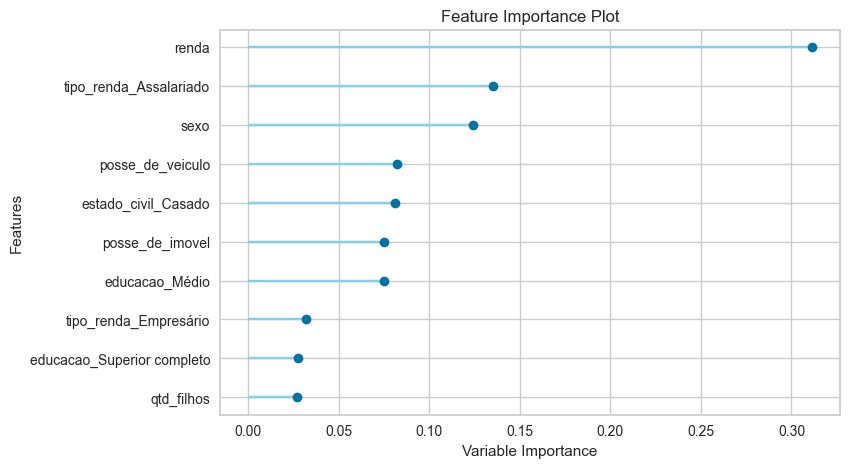

In [98]:

plot_model(best_model, plot='feature')

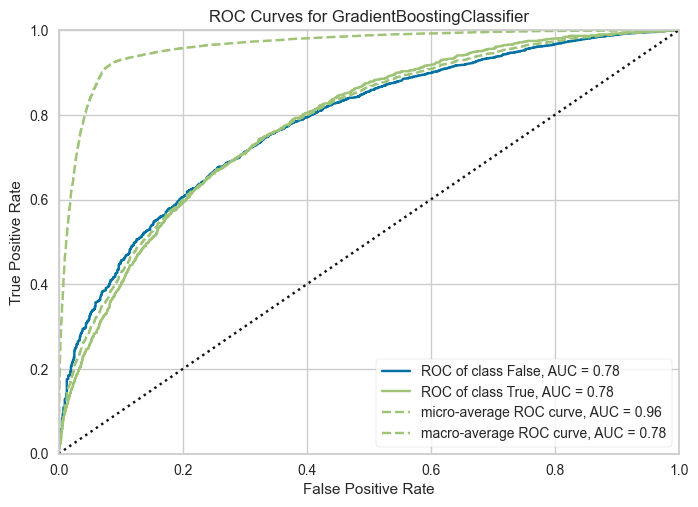

In [99]:
plot_model(best_model, plot='auc')

### Salvar o pickle file do modelo treinado

In [106]:
import pickle

nome_arquivo = 'model_final.pkl'
pickle.dump(best_model, open(nome_arquivo, 'wb'))

# Pycaret na base de dados 

Utilize o pycaret para pre processar os dados e rodar o modelo **lightgbm**. Faça todos os passos a passos da aula e gere os gráficos finais. E o pipeline de toda a transformação.



In [104]:
import pandas as pd

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


In [105]:
from pycaret.classification import *
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [107]:
lightgbm = create_model('lightgbm')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:51:38
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9207,0.7794,0.1038,0.5116,0.1725,0.1497,0.2044
1,0.9211,0.7727,0.0896,0.5278,0.1532,0.1332,0.1938
2,0.9214,0.7946,0.0802,0.5484,0.1399,0.1221,0.1879
3,0.9199,0.7707,0.0755,0.4848,0.1306,0.1115,0.1677
4,0.9218,0.7731,0.0991,0.5526,0.1680,0.1473,0.2102
5,0.9173,0.7673,0.0849,0.4091,0.1406,0.1164,0.1577
6,0.9199,0.7886,0.0849,0.4865,0.1446,0.1238,0.1784
7,0.9177,0.7629,0.0755,0.4103,0.1275,0.1053,0.1489
8,0.9195,0.7718,0.0849,0.4737,0.1440,0.1227,0.1751


In [108]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9211,0.7560,0.0189,0.6667,0.0367,0.0325,0.1030
1,0.9184,0.7692,0.0236,0.3333,0.0441,0.0339,0.0705
2,0.9211,0.7890,0.0142,0.7500,0.0278,0.0249,0.0960
3,0.9199,0.7499,0.0142,0.4286,0.0274,0.0224,0.0662
4,0.9203,0.7641,0.0142,0.5000,0.0275,0.0232,0.0738
5,0.9199,0.7625,0.0236,0.4545,0.0448,0.0373,0.0892
6,0.9203,0.7703,0.0236,0.5000,0.0450,0.0381,0.0953
7,0.9207,0.7444,0.0142,0.6000,0.0276,0.0241,0.0834
8,0.9222,0.7679,0.0330,0.7778,0.0633,0.0572,0.1502


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [112]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [113]:
evaluate_model(final_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

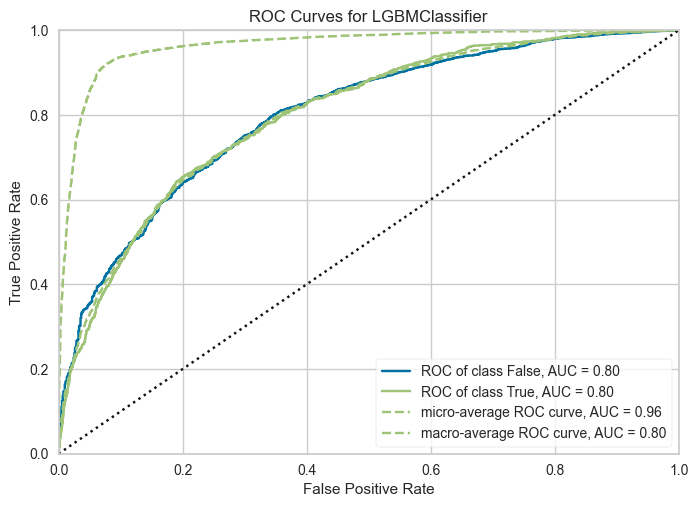

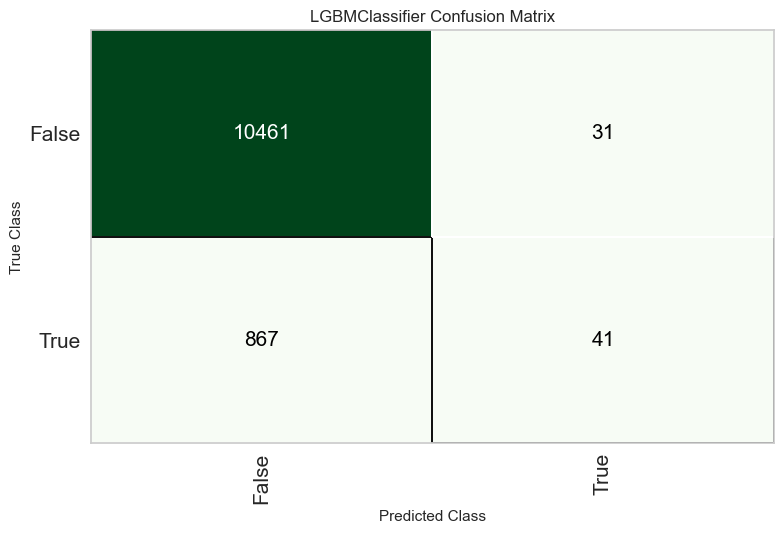

In [114]:
plot_model(final_lightgbm, plot='auc')
plot_model(final_lightgbm, plot='confusion_matrix')

### Salvar o arquivo do modelo treinado

In [115]:
import pickle

nome_arquivo = 'final_lightgbm.pkl'
pickle.dump(final_lightgbm, open(nome_arquivo, 'wb'))

# Projeto Final

1. Subir no GITHUB todos os jupyter notebooks/códigos que você desenvolveu nesse ultimo módulo
1. Gerar um arquivo python (.py) com todas as funções necessárias para rodar no streamlit a escoragem do arquivo de treino
    - Criar um .py
    - Criar um carregador de csv no streamlit 
    - Subir um csv no streamlit 
    - Criar um pipeline de pré processamento dos dados
    - Utilizar o modelo treinado para escorar a base 
        - nome_arquivo = 'model_final.pkl'
1. Gravar um vídeo da tela do streamlit em funcionamento (usando o próprio streamlit (temos aula disso) ou qlqr outra forma de gravação).
1. Subir no Github o vídeo de funcionamento da ferramenta como README.md.
1. Subir no Github os códigos desenvolvidos. 
1. Enviar links do github para o tutor corrigir.